In this time and age of widespread internet usage, effective and targeted marketing play a vital role, a marketing company would like to develop their strategy by analyzing their customer data and how effectively they can do targeted marketing, for this historical data has been collected of users clicking on ad given different factors such as age, location, time of activity and more. Perform Logistic Regression on the given data and classify the user who click’s on ad’s and who does not click on ad. 

**Business Objective :- To predict whether the user click on the ad or not based on the features of the user**

In [1]:
#lets laod the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
#lets import the data
adve = pd.read_csv(r"C:\Users\D\Desktop\New Assignments  Keys\Datasets\advertising.csv")

In [3]:
adve.columns

Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')

Sr. No.	Name of the Feature	Description

1	Daily Time Spent on Site	consumer time on site in minutes

2	Age	consumer age in years

3	Area Income	Avg. Income of geographical area of consumer

4	Daily Internet Usage	Avg. minutes a day consumer is on the internet

5	Ad Topic Line	Headline of the advertisement

6	City	City of consumer

7	Male	Whether or not consumer was male

8	Country	Country of consumer

9	Timestamp	Time at which consumer clicked on Ad or closed window

10	Clicked on Ad	0 or 1 indicated clicking on Ad


In [4]:
adve.isna().sum()

Daily_Time_ Spent _on_Site    0
Age                           0
Area_Income                   0
Daily Internet Usage          0
Ad_Topic_Line                 0
City                          0
Male                          0
Country                       0
Timestamp                     0
Clicked_on_Ad                 0
dtype: int64

In [5]:
#lets remove the not required variables
adve1 = adve.drop(['Ad_Topic_Line', 'City','Country','Timestamp'], axis=1)

In [6]:
adve1.describe()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
adve1.head()


,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Clicked_on_Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [8]:
adve.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily_Time_ Spent _on_Site  1000 non-null   float64
 1   Age                         1000 non-null   int64  
 2   Area_Income                 1000 non-null   float64
 3   Daily Internet Usage        1000 non-null   float64
 4   Ad_Topic_Line               1000 non-null   object 
 5   City                        1000 non-null   object 
 6   Male                        1000 non-null   int64  
 7   Country                     1000 non-null   object 
 8   Timestamp                   1000 non-null   object 
 9   Clicked_on_Ad               1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
adve1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily_Time_ Spent _on_Site  1000 non-null   float64
 1   Age                         1000 non-null   int64  
 2   Area_Income                 1000 non-null   float64
 3   Daily Internet Usage        1000 non-null   float64
 4   Male                        1000 non-null   int64  
 5   Clicked_on_Ad               1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [10]:
adve1.columns

Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Male', 'Clicked_on_Ad'],
      dtype='object')

In [11]:
#lets rename the columns
adve1 = adve1.rename(columns={'Daily_Time_ Spent _on_Site':'time_on_site', 'Daily Internet Usage':'Dat_usage'})

Text(0.5, 0, 'Age')

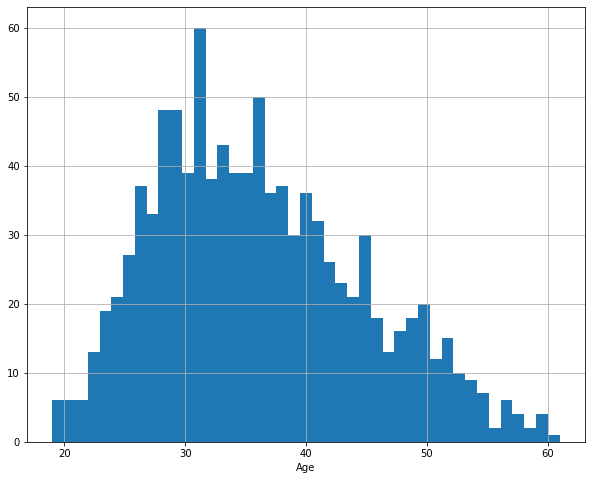

In [12]:
#histogram
plt.figure(figsize=(10, 8))
adve.Age.hist(bins=adve.Age.nunique())
plt.xlabel('Age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


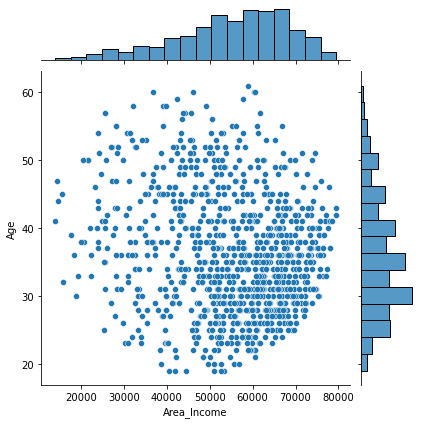

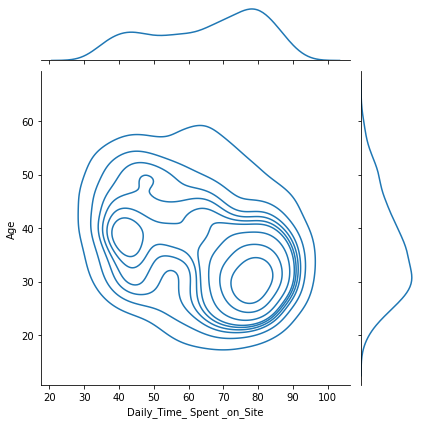

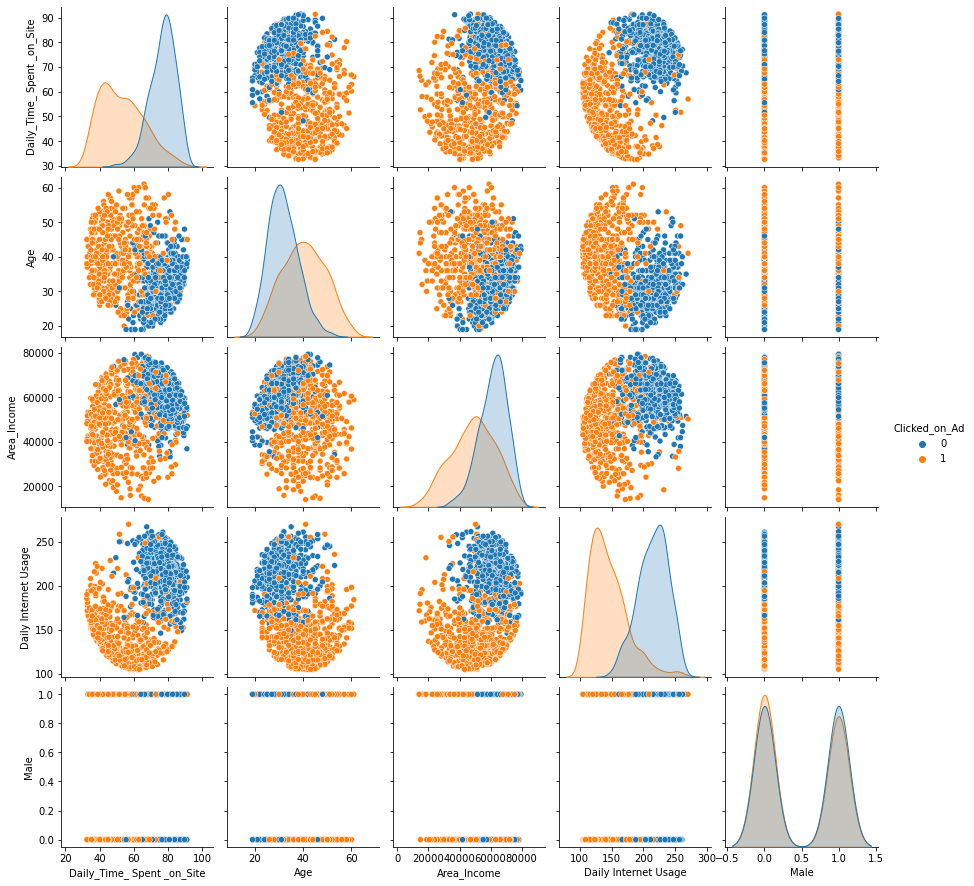

In [13]:
#scatter plot
sb.jointplot(adve["Area_Income"], adve.Age)

sb.jointplot(adve["Daily_Time_ Spent _on_Site"], adve.Age, kind='kde')

sb.pairplot(adve, hue='Clicked_on_Ad')

In [14]:
# Model building 
import statsmodels.formula.api as sm
logit_model = sm.logit('Clicked_on_Ad ~ time_on_site + Age + Area_Income + Dat_usage + Male', data = adve1).fit()


Optimization terminated successfully.
         Current function value: 0.090904
         Iterations 10


In [15]:
#summary
logit_model.summary2() # for AIC



<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.869      
Dependent Variable: Clicked_on_Ad    AIC:              193.8086   
Date:               2022-02-11 12:34 BIC:              223.2551   
No. Observations:   1000             Log-Likelihood:   -90.904    
Df Model:           5                LL-Null:          -693.15    
Df Residuals:       994              LLR p-value:      3.1358e-258
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      27.3606    2.7365   9.9986  0.0000  21.9973  32.7240
time_on_site   -0.1927    0.0208  -9.2865  0.0000  -0.2334  -0.1521
Age             0.1709    0.0259   6.6075  0.0000   0.1202   0.2216
Area_Income    -0.0001    0.0000  -7.2448  0.0000  -0.0002  -0.0001
Dat_usage      -0.0635    0.0068  -9.3901  0.0000  -0.0768  -0.0503
Male           -0.4217    0.4043  -1.0429  0.2970  -1.2142   0.3708
==================================================================

"""

In [16]:
logit_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 Feb 2022   Pseudo R-squ.:                  0.8689
Time:                        12:34:24   Log-Likelihood:                -90.904
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.136e-258
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       27.3606      2.736      9.999      0.000      21.997      32.724
time_on_site    -0.1927      0.021     -9.286      0.000      -0.233      -0.152
Age              0.1709      0.026      6.607      0.000       0.120       0.222
Area_Income     -0.0001   1.88e-05     -7.245      0.000      -0.000   -9.93e-05
Dat_usage       -0.0635      0.007     -9.390      0.000      -0.077      -0.050
Male            -0.4217      0.404     -1.043      0.297      -1.214       0.371
================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
pred = logit_model.predict(adve1.iloc[ :, :5 ])

In [18]:
#ROC
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(adve1.Clicked_on_Ad, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6326111998951834

In [19]:
import pylab as pl

i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
17,0.036,0.966,0.964,0.002,0.370638


[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, '')]

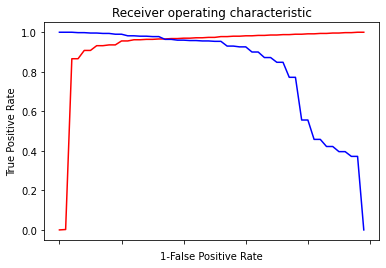

In [20]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [21]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.991800


In [22]:
# filling all the cells with zeroes
adve1["pred"] = np.zeros(1000)


In [23]:
# taking threshold value and above the prob value will be treated as correct value 
adve1.loc[pred > optimal_threshold, "pred"] = 1


In [24]:
# classification report
classification = classification_report(adve1["pred"], adve1["Clicked_on_Ad"])
classification

'              precision    recall  f1-score   support\n\n         0.0       0.99      0.96      0.97       518\n         1.0       0.95      0.99      0.97       482\n\n    accuracy                           0.97      1000\n   macro avg       0.97      0.97      0.97      1000\nweighted avg       0.97      0.97      0.97      1000\n'

In [25]:
### Splitting the data into train and test data 
# from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(adve1, test_size = 0.3)

In [26]:
# Model building 
import statsmodels.formula.api as sm
model = sm.logit('Clicked_on_Ad ~ time_on_site + Age + Area_Income + Dat_usage + Male', data = train_data).fit()


Optimization terminated successfully.
         Current function value: 0.077389
         Iterations 10


In [27]:
#summary
model.summary2() # for AIC

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.888      
Dependent Variable: Clicked_on_Ad    AIC:              120.3451   
Date:               2022-02-11 12:34 BIC:              147.6516   
No. Observations:   700              Log-Likelihood:   -54.173    
Df Model:           5                LL-Null:          -485.18    
Df Residuals:       694              LLR p-value:      4.4321e-184
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      27.1359    3.2905   8.2468  0.0000  20.6867  33.5851
time_on_site   -0.1932    0.0268  -7.1994  0.0000  -0.2458  -0.1406
Age             0.1760    0.0340   5.1771  0.0000   0.1093   0.2426
Area_Income    -0.0001    0.0000  -5.6679  0.0000  -0.0002  -0.0001
Dat_usage      -0.0664    0.0089  -7.4351  0.0000  -0.0839  -0.0489
Male           -0.1539    0.5314  -0.2896  0.7721  -1.1954   0.8877
==================================================================

"""

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 Feb 2022   Pseudo R-squ.:                  0.8883
Time:                        12:34:25   Log-Likelihood:                -54.173
converged:                       True   LL-Null:                       -485.18
Covariance Type:            nonrobust   LLR p-value:                4.432e-184
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       27.1359      3.290      8.247      0.000      20.687      33.585
time_on_site    -0.1932      0.027     -7.199      0.000      -0.246      -0.141
Age              0.1760      0.034      5.177      0.000       0.109       0.243
Area_Income     -0.0001    2.3e-05     -5.668      0.000      -0.000   -8.53e-05
Dat_usage       -0.0664      0.009     -7.435      0.000      -0.084      -0.049
Male            -0.1539      0.531     -0.290      0.772      -1.195       0.888
================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [29]:
# Prediction on Test data set
test_pred = logit_model.predict(test_data)

In [30]:
# Creating new column for storing predicted class of Attorney
# filling all the cells with zeroes
test_data["test_pred"] = np.zeros(300)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19204/2193796625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["test_pred"] = np.zeros(300)


In [31]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 
test_data.loc[test_pred > optimal_threshold, "test_pred"] = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
# confusion matrix 
confusion_matrix = pd.crosstab(test_data.test_pred, test_data['Clicked_on_Ad'])
confusion_matrix

Clicked_on_Ad,0,1
test_pred,,
0.0,152,12
1.0,1,135


In [33]:
accuracy_test = (150 + 141)/(300) 
accuracy_test

0.97

In [34]:
# classification report
classification_test = classification_report(test_data["test_pred"], test_data["Clicked_on_Ad"])
classification_test

'              precision    recall  f1-score   support\n\n         0.0       0.99      0.93      0.96       164\n         1.0       0.92      0.99      0.95       136\n\n    accuracy                           0.96       300\n   macro avg       0.96      0.96      0.96       300\nweighted avg       0.96      0.96      0.96       300\n'

In [35]:
#ROC CURVE AND AUC
fpr, tpr, threshold = metrics.roc_curve(test_data["Clicked_on_Ad"], test_pred)


Text(0, 0.5, 'True positive rate')

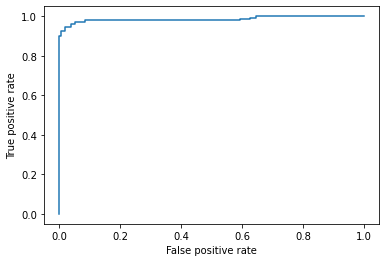

In [36]:
#PLOT OF ROC
plt.plot(fpr, tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")


In [37]:
roc_auc_test = metrics.auc(fpr, tpr)
roc_auc_test

0.9848828420256991

In [38]:
# prediction on train data
train_pred = model.predict(train_data.iloc[ :, :6 ])

In [39]:
# Creating new column 
# filling all the cells with zeroes
train_data["train_pred"] = np.zeros(700)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19204/2287138222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["train_pred"] = np.zeros(700)


In [40]:
# taking threshold value and above the prob value will be treated as correct value 
train_data.loc[train_pred > optimal_threshold, "train_pred"] = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
# confusion matrix
confusion_matrx = pd.crosstab(train_data.train_pred, train_data['Clicked_on_Ad'])
confusion_matrx

Clicked_on_Ad,0,1
train_pred,,
0.0,343,11
1.0,4,342


In [42]:
accuracy_train = (345 + 334)/(700)
print(accuracy_train)

0.97


**Accuracy = 97%**